#SGA_LOANS

## Libraries

In [160]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


##Preprocessing

In [161]:
df=pd.read_csv('/content/train.csv')
dt = pd.read_csv('test.csv')


In [162]:
df.head()

,Id,etat,genre,lieu_naissance,age,statut_matrimonial,ville,type,profession,secteur_activite,anciennete,revenu,logement,taux_interet,assurance,cout_global,charges,decision_finale
0,1678745.0,Dossier à compléter,Homme,SKIKDA,52.0,Marié (e),Annaba,Salarié,Employé,Administration publique,228.0,30493.29,Propriètaire,10.9,153.40,60767.20,NaN,Refusé
1,1890690.0,Dossier soldé,Femme,EL M'GHAIER,36.0,Célibataire,Mila,Salarié,Employé,Fonction publique,86.0,27924.65,Hèbergè,12.9,136.21,63576.08,0.0,Accepté
2,2136855.0,Controle Validé,Femme,TIZI,35.0,Célibataire,Mascara,Salarié,Employé,Activités extra - territoriales,123.0,44587.72,Hèbergè,12.9,218.30,101893.76,NaN,Refusé
3,2489780.0,DÉCAISSÉ TOTALEMENT,Homme,ALGERIE,51.0,Marié (e),Tlemcen,Salarié,Employé,Administration publique,324.0,33273.21,Hèbergè,0.0,99.12,2378.88,NaN,Accepté
4,1905905.0,Dossier soldé,Homme,BISKRA,37.0,Marié (e),Biskra,Salarié,Employé,Administration publique,120.0,59137.56,Propriètaire,10.9,266.10,105409.96,NaN,Refusé


In [163]:
df.shape

(48175, 18)

In [164]:
df.isnull().sum()

Id                        0
etat                      0
genre                   210
lieu_naissance         1880
age                       1
statut_matrimonial        0
ville                     0
type                      0
profession                3
secteur_activite          0
anciennete                3
revenu                    0
logement                  0
taux_interet              0
assurance                 0
cout_global               0
charges               33710
decision_finale           0
dtype: int64

In [165]:
df['charges'].fillna(df["charges"].mean(),inplace=True)
dt['charges'].fillna(dt["charges"].mean(),inplace=True)



In [166]:
df['age'].fillna(df["age"].mean(),inplace=True)
df['anciennete'].fillna(df["anciennete"].mean(),inplace=True)

dt['age'].fillna(dt["age"].mean(),inplace=True)
dt['anciennete'].fillna(dt["anciennete"].mean(),inplace=True)

In [167]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48175 entries, 0 to 48174
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  48175 non-null  float64
 1   etat                48175 non-null  object 
 2   genre               47965 non-null  object 
 3   lieu_naissance      46295 non-null  object 
 4   age                 48175 non-null  float64
 5   statut_matrimonial  48175 non-null  object 
 6   ville               48175 non-null  object 
 7   type                48175 non-null  object 
 8   profession          48172 non-null  object 
 9   secteur_activite    48175 non-null  object 
 10  anciennete          48175 non-null  float64
 11  revenu              48175 non-null  float64
 12  logement            48175 non-null  object 
 13  taux_interet        48175 non-null  float64
 14  assurance           48175 non-null  float64
 15  cout_global         48175 non-null  float64
 16  char

In [168]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23728 entries, 0 to 23727
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  23728 non-null  float64
 1   etat                23728 non-null  object 
 2   genre               23630 non-null  object 
 3   lieu_naissance      22839 non-null  object 
 4   age                 23728 non-null  float64
 5   statut_matrimonial  23728 non-null  object 
 6   ville               23728 non-null  object 
 7   type                23728 non-null  object 
 8   profession          23728 non-null  object 
 9   secteur_activite    23728 non-null  object 
 10  anciennete          23728 non-null  float64
 11  revenu              23728 non-null  float64
 12  logement            23728 non-null  object 
 13  taux_interet        23728 non-null  float64
 14  assurance           23728 non-null  float64
 15  cout_global         23728 non-null  float64
 16  char

In [169]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True)
    s = sns.heatmap(
    corr,
    cmap = cmap,
    square=True,
    cbar_kws={ 'shrink' : .9 },
    ax=ax,
    annot = True,
    annot_kws = { 'fontsize' : 12 }
)

In [170]:
from sklearn.preprocessing import LabelEncoder

# Créer une liste de valeurs pour illustrer l'encodage
col=['etat', 'genre',	'lieu_naissance',	'statut_matrimonial'	,'ville'	,'type'	,'profession'	,'secteur_activite'		,'logement'		,'cout_global',	'charges'	]


# Instancier le LabelEncoder
encoder = LabelEncoder()

# Effectuer le Label Encoding
for c in col:
    df[c] = encoder.fit_transform(df[c])

#for le test also :
for c in col:
    dt[c] = encoder.fit_transform(dt[c])


In [171]:
df.shape



(48175, 18)

In [172]:
df.columns

Index(['Id', 'etat', 'genre', 'lieu_naissance', 'age', 'statut_matrimonial',
       'ville', 'type', 'profession', 'secteur_activite', 'anciennete',
       'revenu', 'logement', 'taux_interet', 'assurance', 'cout_global',
       'charges', 'decision_finale'],
      dtype='object')

In [173]:
dt.shape

(23728, 17)

In [174]:
dt.columns

Index(['Id', 'etat', 'genre', 'lieu_naissance', 'age', 'statut_matrimonial',
       'ville', 'type', 'profession', 'secteur_activite', 'anciennete',
       'revenu', 'logement', 'taux_interet', 'assurance', 'cout_global',
       'charges'],
      dtype='object')

<ipython-input-169-71a5520d0f63>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


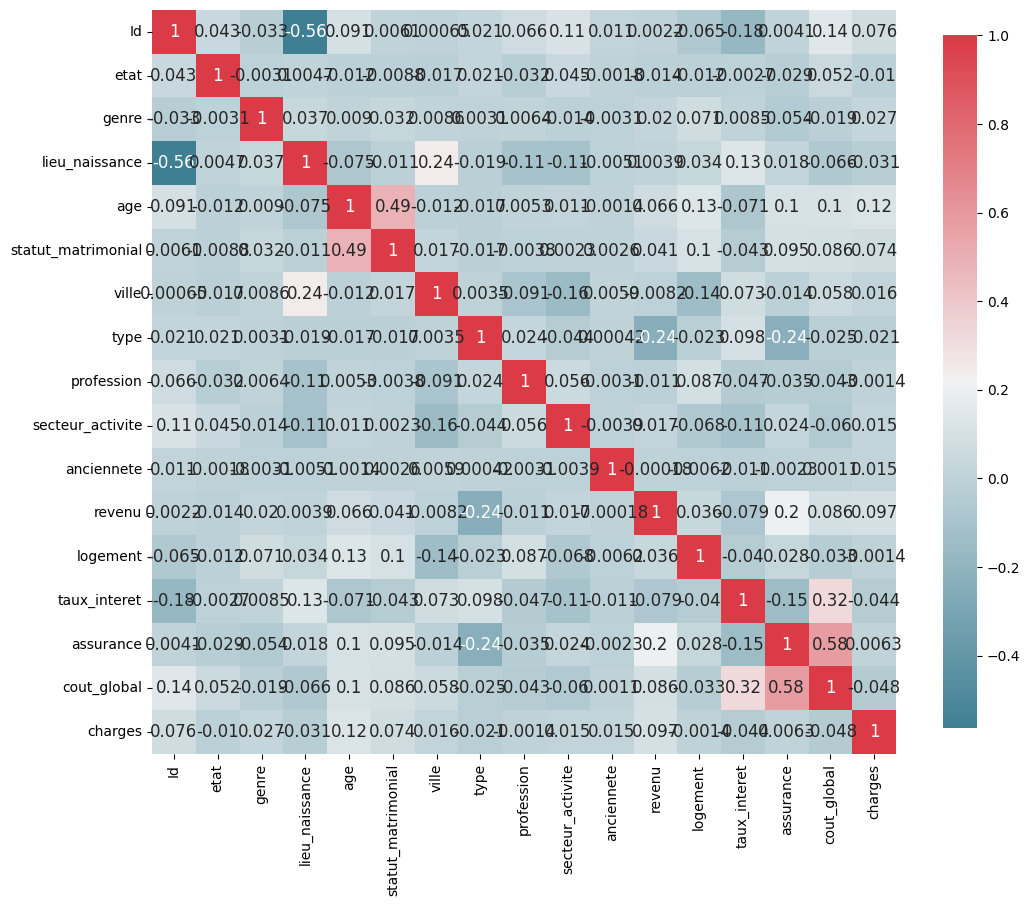

In [175]:
plot_correlation_map(df)

In [176]:
df["decision_finale"] = df["decision_finale"].map({"Accepté":1 ,"Refusé":0 })


In [177]:

X = df.drop('decision_finale',  axis=1)
Y = df['decision_finale']


In [178]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



In [179]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [180]:
X['age'].fillna(X["age"].mean(),inplace=True)
X['anciennete'].fillna(X["anciennete"].mean(),inplace=True)

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_tests = dt

In [182]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Modèle 1

In [183]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion='gini',splitter='best',random_state=None)

# Train the decision tree classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6648676699532953


In [184]:
#class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [185]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier(random_state=0)

#cross_val_score(clf, X_train, y_train, cv=15)

In [186]:
y_resultat1 = clf.predict(dt)


In [187]:
import pandas as pd

# Liste des ID
ids = dt['Id']


# Liste des résultats du test
y_resultat1

# Créer le DataFrame
df_sub_1 = pd.DataFrame({'Id_pret': ids, 'decision_finale': y_resultat1})

# Afficher le DataFrame
print(df_sub_1)

         Id_pret  decision_finale
0      2410020.0                1
1      2154750.0                0
2      2378645.0                1
3      2558420.0                0
4      2628805.0                0
...          ...              ...
23723  1921315.0                1
23724  2328955.0                1
23725  1494595.0                0
23726  2150290.0                0
23727  1806425.0                0

[23728 rows x 2 columns]


In [188]:
import pandas as pd
file_path = '/content/3.csv'
df_sub_1.to_csv(file_path, index=False)

## Modèle 2

In [189]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from joblib import parallel_backend
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [190]:

# Créer un classifieur Random Forest avec 100 arbres
rf_classifier = RandomForestClassifier(n_estimators=500,max_depth = 6,min_samples_split=4)

# Entraîner le classifieur sur les données d'entraînement
rf_classifier.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = rf_classifier.predict(X_test)

# Évaluer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7976128697457188


In [191]:


  # Créer un classifieur Random Forest avec 100 arbres
  rf_classifier = RandomForestClassifier(n_estimators=70,max_depth = 9,min_samples_split= 2)

  # Entraîner le classifieur sur les données d'entraînement
  rf_classifier.fit(X_train, y_train)

  # Faire des prédictions sur les données de test
  y_pred = rf_classifier.predict(X_test)

  # Évaluer la précision du modèle
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)


Accuracy: 0.7978204462895693


In [192]:

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6]
}






In [193]:
#grid_search.fit(X_train, y_train)


In [194]:
# Print the best parameters and best score
#print("Best Parameters:", grid_search.best_params_)
#print("Best Score:", grid_search.best_score_)

In [195]:
y_resultat2 = rf_classifier.predict(dt)



In [196]:
import pandas as pd

# Liste des ID
ids = dt['Id']


# Liste des résultats du test
y_resultat2

# Créer le DataFrame
df_sub_2 = pd.DataFrame({'Id_pret': ids, 'decision_finale': y_resultat2})

# Afficher le DataFrame
print(df_sub_2)

         Id_pret  decision_finale
0      2410020.0                1
1      2154750.0                0
2      2378645.0                1
3      2558420.0                1
4      2628805.0                1
...          ...              ...
23723  1921315.0                0
23724  2328955.0                1
23725  1494595.0                0
23726  2150290.0                0
23727  1806425.0                0

[23728 rows x 2 columns]


In [197]:
import pandas as pd
file_path = '/content/14.csv'
df_sub_2.to_csv(file_path, index=False)

## Modèle 3

In [198]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#When LRate =  0.01  MaxD =  4  n estm =  150  Accuracy :  0.7986507524649714
#When LRate =  0.01  MaxD =  4  n estm =  200  Accuracy :  0.7986507524649714



# Créer un classifieur XGBoost
xgb_classifier = xgb.XGBClassifier(learning_rate= 0.01 ,max_depth = 4, n_estimators= 280)

# Entraîner le classifieur sur les données d'entraînement
xgb_classifier.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = xgb_classifier.predict(X_test)

# Évaluer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(" Accuracy : ", accuracy)

 Accuracy :  0.7974052932018681


In [199]:
#learning_rate': [0.1, 0.01],
    #'max_depth': [3, 5, 7],
    #'n_estimators': [100, 200, 300]

In [200]:

y_resultat3  = xgb_classifier.predict(dt)

#print(results)

In [201]:
import pandas as pd

# Liste des ID
ids = dt['Id']


# Liste des résultats du test
y_resultat3

# Créer le DataFrame
df_sub_3 = pd.DataFrame({'Id_pret': ids, 'decision_finale': y_resultat3})

# Afficher le DataFrame
print(df_sub_3)




         Id_pret  decision_finale
0      2410020.0                1
1      2154750.0                0
2      2378645.0                1
3      2558420.0                1
4      2628805.0                1
...          ...              ...
23723  1921315.0                0
23724  2328955.0                1
23725  1494595.0                0
23726  2150290.0                0
23727  1806425.0                0

[23728 rows x 2 columns]


In [202]:
import pandas as pd
file_path = '/content/50.csv'
df_sub_3.to_csv(file_path, index=False)


## Modèle 4

In [203]:
 from sklearn.model_selection import train_test_split



In [204]:
#X_train, X_test, y_train, y_test = train_test_split(X,y_train , test_size=0.2, random_state=100)
#print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
from keras.layers import Dense
##print("X_test  = ",X_test.shape ," y_test = ", y_test.shape)

In [205]:
from sklearn import datasets
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.utils import class_weight
from sklearn.utils import class_weight

from keras.layers import Dense, Dropout, Flatten


In [206]:
X.shape

(48175, 17)

In [207]:
 model = keras.models.Sequential()
 model.add(keras.layers.Dense(17, input_dim=17, activation='relu'))
 model.add(keras.layers.Dense(32, activation="relu"))
 model.add(keras.layers.Dense(64, activation="relu"))
 model.add(Dropout(0.25))
 model.add(keras.layers.Dense(128, activation="relu"))
 model.add(keras.layers.Dense(64, activation="relu"))
 model.add(keras.layers.Dense(1, activation="sigmoid"))
 print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 17)                306       
                                                                 
 dense_13 (Dense)            (None, 32)                576       
                                                                 
 dense_14 (Dense)            (None, 64)                2112      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 128)               8320      
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 1)                

In [208]:
#Compiling the model
optimizer = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.1, beta_2=0.9, clipvalue=1.0)
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True, clipvalue=1.0)
optimizer=keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9,momentum=0.0,epsilon=1e-07,
centered=False,weight_decay=None,clipnorm=None,clipvalue=None,global_clipnorm=None,use_ema=False,ema_momentum=0.99,ema_overwrite_frequency=100,
jit_compile=True,name="RMSprop",)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])


#Learning rate scheduling
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.0001, patience=2,
                                       monitor="val_accuracy", min_lr=0.00001)

#nterrupts training when it measures no progress on the validation set
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, monitor = "val_loss",
                                                   restore_best_weights=True)

#Class weight
class_weights = class_weight.compute_class_weight(class_weight="balanced",
                                                  classes=np.unique(y_train),
                                                 y=y_train)
class_weights = dict(enumerate(class_weights))
EPOCHS = 200
BS =68
#Training the model
history = model.fit(X_train,
                     y_train
                     , batch_size = BS,
                     steps_per_epoch=len(X_train) // BS,
                     epochs= 20,
                     class_weight= class_weights,
                      validation_data=(X_test, y_test),
                     callbacks=[lr_scheduler, early_stopping_cb] )

#Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
#Training and evaluating the model

Epoch 1/20
566/566 [==============================] - 5s 6ms/step - loss: 368681.8750 - accuracy: 0.5145 - val_loss: 34.3877 - val_accuracy: 0.5307 - lr: 0.0010
Epoch 2/20
566/566 [==============================] - 3s 4ms/step - loss: 532747.5625 - accuracy: 0.5091 - val_loss: 24.8649 - val_accuracy: 0.5311 - lr: 0.0010
Epoch 3/20
566/566 [==============================] - 2s 4ms/step - loss: 278998.0938 - accuracy: 0.5060 - val_loss: 52902.7812 - val_accuracy: 0.5310 - lr: 0.0010
Epoch 4/20
566/566 [==============================] - 3s 4ms/step - loss: 7.1033 - accuracy: 0.5052 - val_loss: 8447.1006 - val_accuracy: 0.4689 - lr: 0.0010
Epoch 5/20
566/566 [==============================] - 3s 5ms/step - loss: 56155.4414 - accuracy: 0.4704 - val_loss: 10074.7139 - val_accuracy: 0.4689 - lr: 1.0000e-05
Epoch 6/20
566/566 [==============================] - 3s 5ms/step - loss: 148184.7188 - accuracy: 0.4695 - val_loss: 8910.7812 - val_accuracy: 0.4689 - lr: 1.0000e-05
Epoch 7/20
566/566 [==

In [209]:
y_pred = model.predict(X_test)

302/302 [==============================] - 1s 2ms/step


In [210]:
accuracy = accuracy_score(y_test.to_numpy(), y_pred.flatten())
print(" Accuracy : ", accuracy)